In [2]:
import PIL
from PIL import Image
import numpy as np

data = Image.open('trainingData/1/2.png')
array = np.array(data)
#array = np.zeros((3,3))

In [21]:
def array_to_file(array, filename):
    file_out = ""
    rows = []
    with open(filename, 'w+') as f:
        for row in array:
            row_str = ",".join([str(x) for x in row])
            f.write(row_str + '\n')
        return rows
        
array_to_file(array, 'test.txt')

[]

In [105]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def box_coords(width, x_scale, y_scale, margin_x_scale, margin_y_scale):
    margin_x = int(margin_x_scale * width)
    margin_y = int(margin_y_scale * width)
    #Square 1
    X, Y = np.meshgrid(range(margin_x, int(width * x_scale) + margin_x), range(margin_y, np.int_(width * y_scale) + margin_y))
    coords = np.concatenate((X[:,:,None], Y[:, :, None]), -1).reshape(-1, 2)
    return coords

def coords_to_img(coords, arr):
    for c in coords:
        arr[c[0], c[1]] = 0.0


def make_image(width, 
               x_scale, 
               y_scale, 
               margin_x_scale, 
               margin_y_scale):
    
    assert x_scale[0] + margin_x_scale[0] <= 1
    assert x_scale[1] + margin_x_scale[1] <= 1
    assert y_scale[0] + margin_y_scale[0] <= 1
    assert y_scale[1] + margin_y_scale[1] <= 1
    
    width = 128
    arr = np.ones((width, width)) * 255

    #coords1 = box_coords(width, 0.2, 0.7, 0.1, 0.2)
    #coords2 = box_coords(width, 0.7, 0.4, 0.1, 0.2)
    
    coords1 = box_coords(width, x_scale[0], y_scale[0], margin_x_scale[0], margin_y_scale[0])
    coords2 = box_coords(width, x_scale[1], y_scale[1], margin_x_scale[1], margin_y_scale[1])
    #coords2 = box_coords(width, 0.7, 0.4, 0.1, 0.2)
    coords_to_img(coords1, arr)
    coords_to_img(coords2, arr)

    plt.figure()
    plt.imshow(arr, cmap='gray', origin='lower')
    #return arr

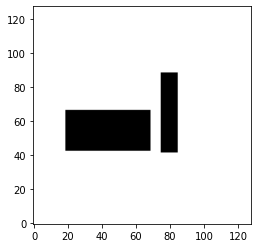

In [267]:

x_scale1 = 0.2 + np.random.uniform() * 0.7
#x_scale2 = 0.2 + np.random.uniform() * 0.7

x_scale2 = np.random.uniform(x_scale1 * 0.2, x_scale1*0.8)

y_scale2 = 0.2 + np.random.uniform() * 0.7
#y_scale2 = 0.2 + np.random.uniform() * 0.7

y_scale1 = np.random.uniform(y_scale2*0.2, y_scale2*0.8)

margin_x_scale1 = np.random.uniform(0, 0.9 - x_scale1)
# Ensure one is smaller than the other
margin_x_scale2_a = np.random.uniform(0, margin_x_scale1)
margin_x_scale2_b = np.random.uniform(0, 0.9 - x_scale2)
#margin_x_scale2 = min(margin_x_scale2_a, margin_x_scale2_b)
margin_x_scale2 = margin_x_scale2_b

margin_y_scale1 = np.random.uniform(0, 0.9 - y_scale1)

margin_y_scale2_a = np.random.uniform(0, margin_y_scale1)
margin_y_scale2_b = np.random.uniform(0, 0.9 - y_scale2)
#margin_y_scale2 = min(margin_y_scale2_a, margin_y_scale2_b)
margin_y_scale2 = margin_y_scale2_b

x_scale = [x_scale1, x_scale2]
y_scale = [y_scale1, y_scale2]
margin_x_scale = [margin_x_scale1, margin_x_scale2]
margin_y_scale = [margin_y_scale1, margin_y_scale2]

make_image(128, x_scale=x_scale, y_scale=y_scale, margin_x_scale=margin_x_scale, margin_y_scale=margin_y_scale)
#make_image(128, x_scale=[0.2, 0.6], y_scale=[0.7, 0.4], margin_x_scale=[0.5, 0.2], margin_y_scale=[0.2, 0.3])

In [261]:
y_scale

[0.26991577953504764, 0.34421761451105726]

In [262]:
margin_y_scale

[0.5163285708851657, 0.7112017773495336]

In [150]:
x_scale2 + margin_x_scale2

1.007206908431956

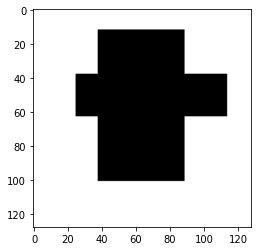

In [51]:
width = 128
arr = np.ones((width, width)) * 255
    
coords1 = box_coords(width, 0.2, 0.7, 0.3, 0.2)
coords2 = box_coords(width, 0.7, 0.4, 0.1, 0.3)

coords_to_img(coords1, arr)
coords_to_img(coords2, arr)

plt.imshow(arr, cmap='gray')